**KAUSTUBH SHIRSATH**

**18NA10011**

**DEEP LEARNING ASSIGNMENT 1 B**

## CONVOLUTIONAL NEURAL NETWORK LENET-5 MODEL ARCHITECTURE

In [29]:
# Importing all the necessary libraries
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np
import torch.optim as optim

from torchvision import transforms, datasets

In [30]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5) # Convolution layer with 1 input channel, 6 output channels and a kernel of 5*5
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5) # Convolution layer with 6 input channel, 16 output channels and 5*5 kernel
        
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Max pooling layer with 2*2 kernel and stride of 2
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # Max pooling layer with 2*2 kernel and stride of 2
        self.fc1 = nn.Linear(400, 120) # Fully Connected layer with a tensor of size 400 input and 120 output 
        self.fc2 = nn.Linear(120, 84) # FC layer with tensor input of size 120 and output size 84
        self.fc3 = nn.Linear(84, 10) # FC layer with tensor input size 84 and output size 10
    
    # Feed forward part
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
    
        return F.softmax(x, dim=1)
        

In [31]:
# initializing some parameters
n_epochs = 10
batchsize = 128
learning_rate = 0.05

# initializing the network
net = LeNet()
optimizer = optim.SGD(net.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()


In [32]:
# Define a transform to normalize the data
# Normalized the dataset (Mean of MNIST dataset: 0.1307, Std of MNIST dataset: 0.3081)
apply_transform = transforms.Compose([transforms.Resize(32),transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

# importing the data
trainset = datasets.MNIST(root="./data", train = True, download = True, transform=apply_transform)
testset = datasets.MNIST(root="./data", train = False, download = True, transform = apply_transform)

# setting up different loaders for train and test set
trainLoader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=4, batch_size = batchsize)
testLoader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=4, batch_size= batchsize)



In [33]:
train_losses = []
test_losses = []
test_accuracy = []
train_accuracy = []

In [34]:
# training loop
def train(epoch):
    net.train()
    total_loss = 0
    correct, all = 0, 0
    for batch_idx, (data, target) in enumerate(trainLoader):
        # setting gradients to zero
        optimizer.zero_grad()
        
        # forward
        output = net(data)
        loss = criterion(output, target)
        
        # backpropagation of error
        loss.backward()
        total_loss += loss.item()
        
        # optimizer step
        optimizer.step()
        
        # calculating accuracy
        _, pred = output.max(1)
        correct += (pred==target).sum()
        all += output.size(0)
    else:
        print("Training: \tEpoch: {} \t Loss: {}".format(epoch, total_loss/len(trainLoader)), 
             "\nTraining Accuracy: {}".format((correct/all).item()))
        train_losses.append(total_loss/len(trainLoader))
        train_accuracy.append((correct/all).item())

            

In [35]:
# testing the model and calculating accuracy 
def test():
    net.eval()
    correct, all = 0,0
    total_loss = 0
    for data, target in testLoader:
        
        # getting model output
        with torch.no_grad():
            scores = net(data)
            
        # calculating accuracy
        _, pred = scores.max(1)
        correct += (pred==target).sum()
        all+=pred.size(0)
        
        # calculating loss
        loss = criterion(scores, target)
        total_loss += loss.sum().item()
    
    # printing the results
    print("Test Accuracy: ", (correct/all).item())
    print("Loss: ", total_loss/len(testLoader))
    test_accuracy.append((correct/all).item())
    test_losses.append(total_loss/len(testLoader))

In [36]:
for epoch in range(1, n_epochs+1):
    train(epoch)
    test()

Training: 	Epoch: 1 	 Loss: 2.2891086703424515 
Training Accuracy: 0.2552666664123535
Test Accuracy:  0.358599990606308
Loss:  2.1597330117527442
Training: 	Epoch: 2 	 Loss: 1.8179457553668317 
Training Accuracy: 0.6592333316802979
Test Accuracy:  0.7064999938011169
Loss:  1.7595166843148726
Training: 	Epoch: 3 	 Loss: 1.7199623485618054 
Training Accuracy: 0.7425166964530945
Test Accuracy:  0.7598999738693237
Loss:  1.7005239860920967
Training: 	Epoch: 4 	 Loss: 1.7009412261214591 
Training Accuracy: 0.7602333426475525
Test Accuracy:  0.7602999806404114
Loss:  1.7009792026085189
Training: 	Epoch: 5 	 Loss: 1.6900067398034688 
Training Accuracy: 0.7702500224113464
Test Accuracy:  0.7786999940872192
Loss:  1.6798017673854586
Training: 	Epoch: 6 	 Loss: 1.682976906233505 
Training Accuracy: 0.7768499851226807
Test Accuracy:  0.7829999923706055
Loss:  1.6758028449891489
Training: 	Epoch: 7 	 Loss: 1.6788653308140444 
Training Accuracy: 0.7806666493415833
Test Accuracy:  0.7842000126838684

In [37]:
#testing our model on some data

images, labels = next(iter(testLoader))
with torch.no_grad():
    logps = net(images)

ps = torch.exp(logps)
prob = list(ps.numpy()[0])
print("Model Prediction: ", prob.index(max(prob)))
print("True label: ", labels[0].item())


Model Prediction:  4
True label:  4


###PART 5

## Draw graph showing the loss vs epoch.

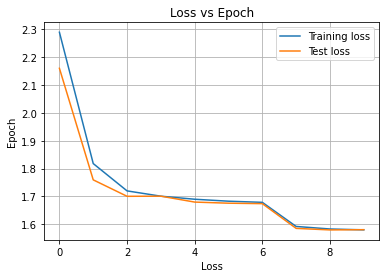

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting training and test losses
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label="Test loss")
plt.legend()
plt.grid()
plt.title("Loss vs Epoch")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.show()


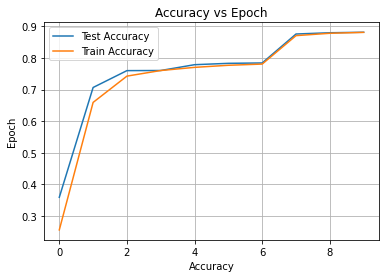

In [39]:
#plotting train and test accuracy

plt.plot(test_accuracy, label='Test Accuracy')
plt.plot(train_accuracy, label='Train Accuracy')
plt.legend()
plt.grid()
plt.title("Accuracy vs Epoch")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.show()


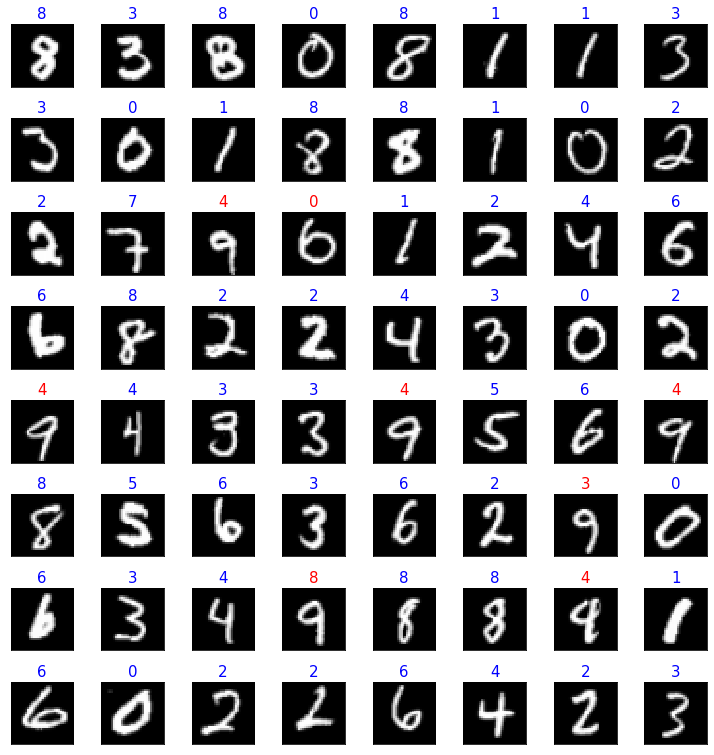

In [41]:
# visualizing a bunch of images (64) with model prediction

# ( Red label indicates wrong prediction, blue label represents correct prediction)

images, labels = next(iter(testLoader))
with torch.no_grad():
    preds = net(images)

images_np = [i.mean(dim=0).numpy() for i in images]
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation = 'nearest')
    color = "blue" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color = color, fontsize=15)


# PART 6 A

## Draw the learning curve showing how train and test error vary with increase in batch size

In [42]:
# batch size vs error

batchsize = 16
errors = []
n_epochs = 2

for i in range(1, 10):
    trainLoader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=4, batch_size = batchsize*i)
    testLoader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=4, batch_size= batchsize*i)
    net = LeNet()
    for epoch in range(1, n_epochs+1):
        train(epoch)
    
    net.eval()
    correct, all = 0,0
    total_loss = 0
    for data, target in testLoader:
        with torch.no_grad():
            scores = net(data)
        loss = criterion(scores, target)
        total_loss += loss.sum().item()

    errors.append(total_loss/len(testLoader))
    print("Batch size: ", batchsize*i, "\tError: ", errors[-1])
    
    

Training: 	Epoch: 1 	 Loss: 2.302756468073527 
Training Accuracy: 0.09993333369493484
Training: 	Epoch: 2 	 Loss: 2.302756474494934 
Training Accuracy: 0.09993333369493484
Batch size:  16 	Error:  2.302701347351074
Training: 	Epoch: 1 	 Loss: 2.3024169094085694 
Training Accuracy: 0.11720000207424164
Training: 	Epoch: 2 	 Loss: 2.302416915003459 
Training Accuracy: 0.11720000207424164
Batch size:  32 	Error:  2.302463919209977
Training: 	Epoch: 1 	 Loss: 2.3027397687911986 
Training Accuracy: 0.11190000176429749
Training: 	Epoch: 2 	 Loss: 2.3027397617340086 
Training Accuracy: 0.11190000176429749
Batch size:  48 	Error:  2.3027026139948354
Training: 	Epoch: 1 	 Loss: 2.3023335234696933 
Training Accuracy: 0.10859999805688858
Training: 	Epoch: 2 	 Loss: 2.3023336729261157 
Training Accuracy: 0.10859999805688858
Batch size:  64 	Error:  2.302360899129491
Training: 	Epoch: 1 	 Loss: 2.302267414410909 
Training Accuracy: 0.10441666841506958
Training: 	Epoch: 2 	 Loss: 2.3022673927942914 


In [43]:
print(errors)

[2.302701347351074, 2.302463919209977, 2.3027026139948354, 2.302360899129491, 2.3022246894836425, 2.302161121368408, 2.3026189194785225, 2.3023350118081782, 2.302879156385149]


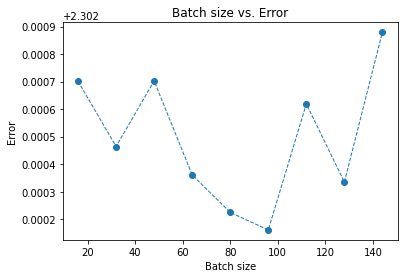

In [44]:
plt.title("Batch size vs. Error")
plt.xlabel("Batch size")
plt.ylabel("Error")
plt.plot([16, 32, 48, 64, 80, 96, 112, 128, 144], errors, marker='o', linestyle='dashed', linewidth=1, markersize=6)
plt.show()

## PART 6 C

####Now instead of keeping learning rate fixed for the complete training, vary your learning rate with number of epochs (you can take any learning rate value and decrease it as per your choice). Observe rate of convergence of model. Write your observation in brief.

In [45]:
# learning rate vs test error

trainLoader = torch.utils.data.DataLoader(trainset, shuffle=True, num_workers=4, batch_size = 64)
testLoader = torch.utils.data.DataLoader(testset, shuffle=True, num_workers=4, batch_size= 64)

learning_rates = [0.025, 0.05, 0.1, 0.2, 0.5]
errors = []
n_epochs = 3

for learning_rate in learning_rates:
    net = LeNet()
    optimizer = optim.SGD(net.parameters(), lr = learning_rate)
    for epoch in range(1, n_epochs+1):
        train(epoch)
    
    net.eval()
    correct, all = 0,0
    total_loss = 0
    for data, target in testLoader:
        with torch.no_grad():
            scores = net(data)
        loss = criterion(scores, target) # Find Loss
        total_loss += loss.sum().item()

    errors.append(total_loss/len(testLoader))
    print("Learning rate: ", learning_rate, "\tError: ", errors[-1])
    


Training: 	Epoch: 1 	 Loss: 2.298874699993174 
Training Accuracy: 0.22963333129882812
Training: 	Epoch: 2 	 Loss: 1.8602888919651381 
Training Accuracy: 0.6435666680335999
Training: 	Epoch: 3 	 Loss: 1.6986809604203523 
Training Accuracy: 0.7647833228111267
Learning rate:  0.025 	Error:  1.6968719154406504
Training: 	Epoch: 1 	 Loss: 2.2111316825281073 
Training Accuracy: 0.23146666586399078
Training: 	Epoch: 2 	 Loss: 1.6272919901144276 
Training Accuracy: 0.8379499912261963
Training: 	Epoch: 3 	 Loss: 1.546771814955323 
Training Accuracy: 0.9177333116531372
Learning rate:  0.05 	Error:  1.5103668900811749
Training: 	Epoch: 1 	 Loss: 1.8557212698434207 
Training Accuracy: 0.6276999711990356
Training: 	Epoch: 2 	 Loss: 1.53762669273531 
Training Accuracy: 0.9256666898727417
Training: 	Epoch: 3 	 Loss: 1.4952873454165103 
Training Accuracy: 0.9673833250999451
Learning rate:  0.1 	Error:  1.4901710262723789
Training: 	Epoch: 1 	 Loss: 1.6599370429256577 
Training Accuracy: 0.808066666126

In [46]:
print(errors)

[1.6968719154406504, 1.5103668900811749, 1.4901710262723789, 1.4851938197567205, 1.512940450838417]


## PART 6B

### Plot the test error vs learning rate for each of the model. Vary the learning rates as 0.025, 0.05, 0.1, 0.2 and 0.5. Which learning rate would you prefer for this problem and why? (write this answer in your python notebook itself.)


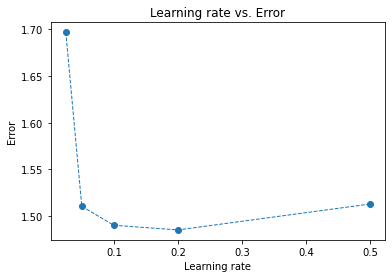

In [47]:
plt.title("Learning rate vs. Error")
plt.xlabel("Learning rate")
plt.ylabel("Error")
plt.plot(learning_rates, errors, marker='o', linestyle='dashed', linewidth=1, markersize=6)
plt.show()

# CONCLUSIONS

**From the above graph, it is visible that the model error is lowest when learning rate is 0.2 in this case.**

**So, we should take the learning rate as 0.2 for better accuracy of our model**